## 統計學習與深度學習 (Fall, 2021) Homework 2
R09725060  黃瀚陞

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
import csv
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

### 第一題 [Data Preprocessing]

In [2]:
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [3]:
with open('adultdata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',',skipinitialspace=True)
    train = np.asarray(list(rows),dtype=None)
    
with open('adulttest.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',',skipinitialspace=True)
    test = np.asarray(list(rows),dtype=None)

In [4]:
# delete the rows that contain "?" (missing value)
train=train[~np.any(train=="?", axis=1)]
print(train)
test=test[~np.any(test == "?", axis=1)]
print(test)

[['39' 'State-gov' '77516' ... '40' 'United-States' '<=50K']
 ['50' 'Self-emp-not-inc' '83311' ... '13' 'United-States' '<=50K']
 ['38' 'Private' '215646' ... '40' 'United-States' '<=50K']
 ...
 ['58' 'Private' '151910' ... '40' 'United-States' '<=50K']
 ['22' 'Private' '201490' ... '20' 'United-States' '<=50K']
 ['52' 'Self-emp-inc' '287927' ... '40' 'United-States' '>50K']]
[['25' 'Private' '226802' ... '40' 'United-States' '<=50K.']
 ['38' 'Private' '89814' ... '50' 'United-States' '<=50K.']
 ['28' 'Local-gov' '336951' ... '40' 'United-States' '>50K.']
 ...
 ['38' 'Private' '374983' ... '50' 'United-States' '<=50K.']
 ['44' 'Private' '83891' ... '40' 'United-States' '<=50K.']
 ['35' 'Self-emp-inc' '182148' ... '60' 'United-States' '>50K.']]


In [5]:
# Make the order of columns same as adult50kp['columnname']
train_sorted=np.copy(train)
train_sorted[:,0]=train[:,11] #capital-loss
train_sorted[:,1]=train[:,12] #hours-per-week
train_sorted[:,2]=train[:,10] #capital-gain
train_sorted[:,3]=train[:,4] #education-num
train_sorted[:,4]=train[:,0] #age
train_sorted[:,5]=train[:,2] #fnlwgt
train_sorted[:,6]=train[:,7] #relationship
train_sorted[:,7]=train[:,8] #race
train_sorted[:,8]=train[:,9] #sex
train_sorted[:,9]=train[:,6] #occupation
train_sorted[:,10]=train[:,3] #education
train_sorted[:,11]=train[:,13] #native-country
train_sorted[:,12]=train[:,1] #workclass
train_sorted[:,13]=train[:,5] #marital-status

In [6]:
test_sorted=np.copy(test)
test_sorted[:,0]=test[:,11]
test_sorted[:,1]=test[:,12]
test_sorted[:,2]=test[:,10]
test_sorted[:,3]=test[:,4]
test_sorted[:,4]=test[:,0]
test_sorted[:,5]=test[:,2]
test_sorted[:,6]=test[:,7]
test_sorted[:,7]=test[:,8]
test_sorted[:,8]=test[:,9]
test_sorted[:,9]=test[:,6]
test_sorted[:,10]=test[:,3]
test_sorted[:,11]=test[:,13]
test_sorted[:,12]=test[:,1]
test_sorted[:,13]=test[:,5]

In [7]:
# normalization
xscaler=preprocessing.StandardScaler().fit(train_sorted[:,:6])
train_sorted[:,:6]=xscaler.transform(train_sorted[:,:6])
test_sorted[:,:6]=xscaler.transform(test_sorted[:,:6])

In [8]:
# encoding
numeric_column=["capital-loss","hours-per-week","capital-gain","education-num","age","fnlwgt"]
categorical_column=["relationship","race","sex","occupation","education","native-country","workclass","marital-status","y_label"]
train_sorted=pd.DataFrame(train_sorted,columns=numeric_column+categorical_column)
test_sorted=pd.DataFrame(test_sorted,columns=numeric_column+categorical_column)
total_category=pd.concat([train_sorted[categorical_column],test_sorted[categorical_column]],axis=0)
total_dum=pd.get_dummies(total_category)

In [9]:
train_num=train_sorted[numeric_column]
test_num=test_sorted[numeric_column]

train_dum=total_dum[:30162]
y_train=train_dum['y_label_>50K'].to_numpy().astype(float)
train_dum=train_dum.drop(['y_label_<=50K','y_label_>50K','y_label_<=50K.','y_label_>50K.'],axis=1)
test_dum=total_dum[30162:]
y_test=test_dum['y_label_>50K.'].to_numpy().astype(float)
test_dum=test_dum.drop(['y_label_<=50K','y_label_>50K','y_label_<=50K.','y_label_>50K.'],axis=1)

x_train=pd.concat([train_num,train_dum],axis=1).to_numpy().astype(float)
x_test=pd.concat([test_num,test_dum],axis=1).to_numpy().astype(float)

In [10]:
# delete rare columns
rare_column=[]
for i in range(6,len(x_train[0])):
    if np.sum(x_train[:,i])<10:
        rare_column.append(i)

x_train=np.delete(x_train,rare_column,axis=1)
x_test=np.delete(x_test,rare_column,axis=1)

In [11]:
adult50k={'x_train':x_train,'x_test':x_test,'y_train':y_train,'y_test':y_test}
elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    #cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    cnomatch = np.sum(np.round(adult50kp[aelem],8) != np.round(adult50k[aelem],8))
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


In [12]:
adult50kp['x_train'][0]

array([-0.21858598, -0.07773411,  0.14609228,  1.12891838,  0.04279571,
       -1.0627216 ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [13]:
adult50k['x_train'][0]

array([-0.21858598, -0.07773411,  0.14609228,  1.12891838,  0.04279571,
       -1.0627216 ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

補充說明：  
在比較處理完的資料與題目所附的pickle檔案資料時有發現連續變數的欄位列印出來看起來一樣，但是直接比較卻會顯示為不一樣，推測應該可能是連續變數直接使用浮點數與浮點數的比較時會有不相同的狀況發生，所以我在比較時有先把值都統一取到小數點後第八位，比較結果就顯示相同了。

### 第二題 [ROC and AUC]

In [14]:
# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)  

Accuracy = 0.848340


#### Q2.1 ROC Curve

In [15]:
p_positive=ypredprob[:,0]
true_class=adult50kp['y_test'].copy()

sort_index=np.argsort(-p_positive)
p_positive=p_positive[sort_index]
true_class=true_class[sort_index]

In [16]:
TPr_list=[]
FPr_list=[]

for t in range(100,-1,-1):
    threshold=t/100
    pred_class=np.zeros(len(p_positive))
    
    for i in range(len(p_positive)):
        if p_positive[i]>=threshold:
            pred_class[i]=0
        else:
            pred_class[i]=1

    tp=fn=fp=tn=0
    
    for j in range(len(p_positive)):
        if true_class[j]==0:
            if pred_class[j]==0: 
                tp=tp+1
            else: 
                fn=fn+1
        else: 
            if pred_class[j]==0: 
                fp=fp+1
            else:
                tn=tn+1
    
    TPr=tp/(tp+fn)
    FPr=fp/(fp+tn)
    TPr_list.append(TPr)
    FPr_list.append(FPr)
    #print("threshold:",threshold,"rate:",TPr,FPr)

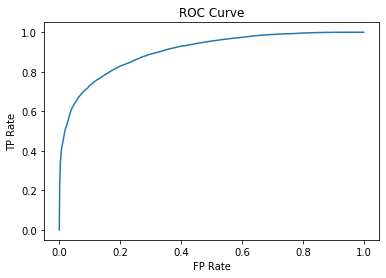

In [17]:
plt.plot(FPr_list,TPr_list)
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.show()

#### Q2.2 ROC Curve的AUC

In [18]:
area=0
for i in range(len(TPr_list)-1):
    area=area+1/2*(TPr_list[i+1]+TPr_list[i])*(FPr_list[i+1]-FPr_list[i])
print("AUC:",area)

AUC: 0.9033141891891892


### 第三題 [Logistic Regression with L2 Regularization]

#### Q3.1 Derive the gradient and hessian matrix for the new E(w).

Gradient:  
$ \nabla E(w) = \sum_{n=1}^N (y_n - t_n) \phi_n + \Lambda \mathbf{w} = \Phi^T (\mathbf{y}-\mathbf{t}) + \Lambda \mathbf{w}$  
  
Hessian:  
$ H=\nabla\nabla E(w)=\sum_{n=1}^N y_n (1-y_n) \phi_n\phi_n^T + \Lambda \mathbf{I}=\Phi^T\mathbf{R}\Phi+\Lambda\mathbf{I}$

#### Q3.2 Create your mylogistic_l2 class. Train your model and show the learned $w$ as well as test accuracy for the cases below. If $w$ is too long for you, show selected $w$ for continuous-valued, binary-valued, and the constant term.

In [19]:
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
Y_train=adult50kp['y_train']
X_train=adult50kp['x_train']
Y_test=adult50kp['y_test']
X_test=adult50kp['x_test']

In [20]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        ### Add your code here
        
        self.reg_vec=reg_vec
        self.reg_matrix=None
        self.max_iter=max_iter
        self.tol=tol
        self.add_intercept=add_intercept
        self.X_train=None
        self.Y_train=None
        self.weight=None       

    def fit(self, x, y, verbal = False):
        #Add your code here   
        
        if(self.add_intercept):
            x=np.c_[x,np.ones(len(x))] #add intercept column to x
            #self.reg_vec=np.append(self.reg_vec,[0])
        
        n,m=x.shape
        reg_matrix=np.zeros((m,m))

        
        for i in range(len(self.reg_vec)):
            reg_matrix[i][i]=self.reg_vec[i]
            
        self.reg_matrix=reg_matrix
        self.X_train=x
        self.Y_train=y
        n,m=self.X_train.shape  
        
        b=np.average(self.reg_vec)
        I=np.identity(m)
        
        w_current=np.dot(np.dot(np.linalg.inv(np.dot(self.X_train.T,self.X_train)+b*I),self.X_train.T),self.Y_train)
        w_small=w_current.copy()
        
        pred_temp=1/(1+np.exp(-1*np.dot(w_current,self.X_train.T)))
        error_min=(-1)*(np.dot(self.Y_train.T,np.log(pred_temp))+np.dot(1-self.Y_train,np.log(1-pred_temp)))\
                    +1/2*np.dot(np.dot(w_current.T,self.reg_matrix),w_current)
        error_last=error_min
        
        count=0
        while(count<self.max_iter):
            
            pred_temp=1/(1+np.exp(-1*np.dot(w_current,self.X_train.T))) #prediction of this run
            
            R=np.identity(n)
            for i in range(len(R)):
                R[i][i]=pred_temp[i]*(1-pred_temp[i])

            gradient=np.dot(self.X_train.T,pred_temp-self.Y_train)+np.dot(self.reg_matrix,w_current)
            hessian=np.dot(np.dot(self.X_train.T,R),self.X_train)+self.reg_matrix
            w_current=w_current-np.dot(np.linalg.inv(hessian),gradient)
            
            error_current=(-1)*(np.dot(self.Y_train.T,np.log(pred_temp))+np.dot(1-self.Y_train,np.log(1-pred_temp)))\
                            +(1/2)*np.dot(np.dot(w_current.T,self.reg_matrix),w_current)
            
            
            error_difference=abs(error_last-error_current)
            error_last=error_current
            
            if error_current<error_min:
                error_min=error_current
                w_small=w_current.copy()
            if error_difference<self.tol:
                break;
            
            if verbal:
                print("SMALLEST ERROR:",error_min,"CURRENT ERROR:",error_current)
            count=count+1

        self.weight=w_small
#         print(self.weight)
                

    def predict(self, x):
        """doing prediction"""
        ### add your code here.
        w_current=self.weight
        x=np.c_[x,np.ones(len(x))]
        pred=1/(1+np.exp(-1*np.dot(w_current,x.T))) #prediction of this run
        for i in range(len(pred)):
            if pred[i]>=0.5:
                pred[i]=1
            else:
                pred[i]=0
        return pred
    
    def CalAccuracy(self, y_pred, y_true):
        correct=0
        for i in range(len(y_pred)):
            if(y_pred[i]==y_true[i]):
                correct=correct+1       
        return correct/len(y_pred)

##### Case1

In [21]:
n,m=X_train.shape
reg_vec=np.ones(m)
reg_vec=np.append(reg_vec,[1]) #because add_intercept==true, users should add intercept in andvance

lambda_vec=reg_vec

logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred = logic1.predict(X_test)
accuracy=logic1.CalAccuracy(ypred,Y_test)
print("ACCURACY:",accuracy)
print("WEIGHT:\n",logic1.weight)

ACCURACY: 0.847875166002656
WEIGHT:
 [ 0.25831075  0.35295138  2.33390153  0.75114521  0.33352443  0.07923687
 -0.259306   -0.03310589 -0.8020923  -1.16328381 -0.15748024  1.06974336
 -0.63384606  0.11673241 -0.23156738 -0.51712221 -0.07972165 -1.0994978
 -0.24602709  0.06196949  0.12668588  0.86265606 -0.91835284 -0.62122618
 -0.20074022 -0.75160098 -1.61011588  0.57582091  0.64899528  0.35374143
  0.71721847 -0.02844947 -0.00095482 -0.1965409  -0.14635164  0.62694627
  0.44820708  0.02459458  0.04692237 -0.49106775 -0.20303542 -0.16330368
 -0.01766235 -0.11132832 -0.09946182 -1.17391916  0.18070268 -0.069272
  0.9764969   0.4609886  -0.49544041 -1.27203531  0.48677241 -0.89896373
 -0.06005426 -0.35084885  0.43281522  0.59412015  0.58215192 -0.62096228
 -0.05974804  0.09290352 -0.1518921  -0.00538529  0.03416091 -0.28908824
  0.15605391  0.49540124  0.89094226  0.14915144  0.34248478 -0.31331216
 -0.35593911 -0.36249461 -0.66724748 -0.40883113  0.44748983  0.13776893
  0.14135123 -0.1

##### Case2

In [22]:
n,m=X_train.shape
reg_vec=np.ones(m)
reg_vec=np.append(reg_vec,[0]) #because add_intercept==true, users should add intercept in andvance

lambda_vec=reg_vec

logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred = logic1.predict(X_test)
accuracy=logic1.CalAccuracy(ypred,Y_test)
print("ACCURACY:",accuracy)
print("WEIGHT:\n",logic1.weight)

ACCURACY: 0.8477423638778221
WEIGHT:
 [ 0.25833063  0.35307341  2.33348256  0.7378757   0.33385106  0.07926886
 -0.04219572  0.19987643 -0.58360967 -0.93671318  0.0754847   1.28715744
 -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
 -0.09910239 -0.64944042 -1.55235099  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.0728464  -0.11752645 -0.06282948  0.67242506
  0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
  0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
 -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160106  0.48879121  0.17662205
  0.17410342 -

##### Case3

In [23]:
n,m=X_train.shape
reg_vec=np.ones(m)
for i in range(6,m):
    reg_vec[i]=0.5
reg_vec=np.append(reg_vec,[0]) #because add_intercept==true, users should add intercept in andvance

lambda_vec=reg_vec

logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred = logic1.predict(X_test)
accuracy=logic1.CalAccuracy(ypred,Y_test)
print("ACCURACY:",accuracy)
print("WEIGHT:\n",logic1.weight)

ACCURACY: 0.847675962815405
WEIGHT:
 [ 0.25851661  0.3533387   2.33562764  0.7825921   0.33439916  0.07940036
 -0.08347988  0.23309138 -0.59278097 -0.92248498  0.11139578  1.25425868
 -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283129 -0.42890321
  0.42890321  0.23635124  0.30021363  1.03810523 -0.75216084 -0.45341369
 -0.02691155 -0.58252688 -2.00075405  0.75127893  0.82696619  0.52830707
  0.89488996  0.14510376  0.18253094 -0.02583999  0.00991404  0.89862004
  0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
  0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
  1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
 -0.00957212 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
 -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
  0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
 -0.29178766 -0.38125401 -0.96291964 -0.45007954  0.512985    0.22019382
  0.22640627 -0

#### 3.3 Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters.

In [24]:
def tuning(a1,a2,x_subtrain,x_tune,y_subtrain,y_tune):
    n,m=x_subtrain.shape
    reg_vec=np.ones(m)
    
    for i in range(0,6):
        reg_vec[i]=a1
    for i in range(6,m):
        reg_vec[i]=a2
    reg_vec=np.append(reg_vec,[0]) #because add_intercept==true, users should add intercept in andvance
    #print(reg_vec)

    lambda_vec=reg_vec
    logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic1.fit(x_subtrain,y_subtrain)
    ypred = logic1.predict(x_tune)
    accuracy=logic1.CalAccuracy(ypred,y_tune)
    print("Con:",a1,",Bin:",a2,"-------ACCURACY:",accuracy)
    return accuracy

In [25]:
X_subtraining,X_tuning,y_subtraining,y_tuning=train_test_split(X_train,Y_train,test_size=0.1,random_state=87)

# tuning grids
grids=[0.01,0.05,0.1,0.5,1,5,10,20,50,100] 

In [26]:
# Step1: a1=a2
equal_weight_acc=[]

for i in range(len(grids)):
    a1=grids[i]
    a2=grids[i]
    accuracy=tuning(a1,a2,X_subtraining,X_tuning,y_subtraining,y_tuning)
    equal_weight_acc.append(accuracy)

Con: 0.01 ,Bin: 0.01 -------ACCURACY: 0.8485250248591316
Con: 0.05 ,Bin: 0.05 -------ACCURACY: 0.8485250248591316
Con: 0.1 ,Bin: 0.1 -------ACCURACY: 0.8485250248591316
Con: 0.5 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 1 ,Bin: 1 -------ACCURACY: 0.8488564799469672
Con: 5 ,Bin: 5 -------ACCURACY: 0.8475306595956248
Con: 10 ,Bin: 10 -------ACCURACY: 0.8475306595956248
Con: 20 ,Bin: 20 -------ACCURACY: 0.8478621146834604
Con: 50 ,Bin: 50 -------ACCURACY: 0.848193569771296
Con: 100 ,Bin: 100 -------ACCURACY: 0.8471992045077892


In [27]:
# Step2: according to step1, choose 0.5 as the best value and fix a1=0.5
fix_a1_acc=[]

for i in range(len(grids)):
    a1=0.5
    a2=grids[i]
    accuracy=tuning(a1,a2,X_subtraining,X_tuning,y_subtraining,y_tuning)
    fix_a1_acc.append(accuracy)


Con: 0.5 ,Bin: 0.01 -------ACCURACY: 0.8485250248591316
Con: 0.5 ,Bin: 0.05 -------ACCURACY: 0.8485250248591316
Con: 0.5 ,Bin: 0.1 -------ACCURACY: 0.8488564799469672
Con: 0.5 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 0.5 ,Bin: 1 -------ACCURACY: 0.8488564799469672
Con: 0.5 ,Bin: 5 -------ACCURACY: 0.8475306595956248
Con: 0.5 ,Bin: 10 -------ACCURACY: 0.8468677494199536
Con: 0.5 ,Bin: 20 -------ACCURACY: 0.8468677494199536
Con: 0.5 ,Bin: 50 -------ACCURACY: 0.8478621146834604
Con: 0.5 ,Bin: 100 -------ACCURACY: 0.8475306595956248


In [28]:
# Step2: choose 0.5 as the best value and fix a2=0.5
fix_a1_acc=[]

for i in range(len(grids)):
    a1=grids[i]
    a2=0.5
    accuracy=tuning(a1,a2,X_subtraining,X_tuning,y_subtraining,y_tuning)
    fix_a1_acc.append(accuracy)

Con: 0.01 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 0.05 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 0.1 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 0.5 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 1 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 5 ,Bin: 0.5 -------ACCURACY: 0.8495193901226383
Con: 10 ,Bin: 0.5 -------ACCURACY: 0.8498508452104739
Con: 20 ,Bin: 0.5 -------ACCURACY: 0.8501823002983095
Con: 50 ,Bin: 0.5 -------ACCURACY: 0.8488564799469672
Con: 100 ,Bin: 0.5 -------ACCURACY: 0.848193569771296


In [29]:
# the best combination is (a1,a2)=(20,0.5) and the accuracy is about 0.8502
# therefore, select (a1,a2)=(20,0.5) as the parameters to train the final model and test the accuracy
a1=20
a2=0.5

n,m=X_train.shape
reg_vec=np.ones(m)
    
for i in range(0,6):
    reg_vec[i]=a1
for i in range(6,m):
    reg_vec[i]=a2
reg_vec=np.append(reg_vec,[0]) #because add_intercept==true, users should add intercept in andvance
lambda_vec=reg_vec

logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred = logic1.predict(X_test)
accuracy=logic1.CalAccuracy(ypred,Y_test)
print("Con:",a1,",Bin:",a2,"-------TEST ACCURACY:",accuracy)

Con: 20 ,Bin: 0.5 -------TEST ACCURACY: 0.8477423638778221


說明：  
以 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100 作為訓練的參數。  
當 $a_1$ = $a_2$ 時，$a_1$ = $a_2$ = 0.5 和 $a_1$ = $a_2$ = 1 在準確率的表現上是最好，在這裡我選擇 0.5 做為 $a_1^*$ 和 $a_2^*$     
固定 $a_1$ = $a_1^*$ = 0.5 訓練，發現 $a_2$ = 0.1, 0.5, 1 時在準確率的表現上是最好，在這裡我選擇 0.5 做為新的 $a_2^*$ 進入下一輪調校   
固定 $a_2$ = $a_2^*$ = 0.5 訓練，發現 (a1,a2) = (20,0.5) 時的準確率表現(約0.8502)最好，故選擇此組合做為最後訓練模型的參數  
使用 ($a_1$,$a_2$) = (20,0.5) 訓練模型，在testing資料的準確率表現為0.8477423638778221

#### 3.4 Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning).

In [30]:
skl_accuracy=[]
grids=[0.01,0.05,0.1,0.5,1,5,10,20,50,100]

for i in range(len(grids)):
    lrg=LogisticRegression(solver='newton-cg',C=grids[i])
    lrg.fit(X_subtraining,y_subtraining)
    ypred=lrg.predict(X_tuning)
    ncorrect=np.sum(y_tuning==ypred)
    accuracy=ncorrect/y_tuning.shape[0]
    print("C:",grids[i],"-------ACCURACY:",accuracy)
    skl_accuracy.append(accuracy)

C: 0.01 -------ACCURACY: 0.8471992045077892
C: 0.05 -------ACCURACY: 0.8478621146834604
C: 0.1 -------ACCURACY: 0.8475306595956248
C: 0.5 -------ACCURACY: 0.848193569771296
C: 1 -------ACCURACY: 0.8488564799469672
C: 5 -------ACCURACY: 0.8488564799469672
C: 10 -------ACCURACY: 0.8485250248591316
C: 20 -------ACCURACY: 0.8485250248591316
C: 50 -------ACCURACY: 0.8485250248591316
C: 100 -------ACCURACY: 0.8485250248591316


In [31]:
# according the result of tuning, choose c=1 as the final model parameter
lrg=LogisticRegression(solver='newton-cg',C=1)
lrg.fit(X_train,Y_train)
ypred=lrg.predict(X_test)
ncorrect=np.sum(Y_test==ypred)
accuracy=ncorrect/Y_test.shape[0]
print("C:1-------TESTING ACCURACY:",accuracy)

C:1-------TESTING ACCURACY: 0.8477423638778221


說明：  
在sklearn.linear_model.LogisticRegression的使用上，C這個參數會跟regularization有關，因此我使用跟3.3題一樣的grids去調校C這個參數。調校結果發現，當 C=1 和 C=5 的時候有最高的準確率。  
若比較3.4與3.3，可以發現3.3題在固定 $a_1$=$a_2$ 時，除了 $a_1$=$a_2$=0.5 ， $a_1$=$a_2$=1 也會跟 $a_1$=$a_2$=0.5 一樣有最好的準確率，推測可能 C=1 會有比較好的結果，因此選擇 C=1 做為最後模型訓練的參數，最後在testing資料的準確率表現為0.8477423638778221，與3.3題的準確率相同。